In [2]:
!pip install plotly


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\vinut\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [93]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# high = pd.read_csv(r'C:\Users\vinut\OneDrive\Desktop\DSC148\final_project\high_popularity_spotify_data.csv')
# low = pd.read_csv(r'C:\Users\vinut\OneDrive\Desktop\DSC148\final_project\low_popularity_spotify_data.csv')

In [95]:
df = pd.read_csv(r'C:\Users\vinut\OneDrive\Desktop\DSC148\song_popularity\dataset_2.csv')
df = df.drop(columns = ['Unnamed: 0'])
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [96]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [97]:
df[df.isna().any(axis=1)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [98]:

df.columns
df['popularity']

0         73
1         55
2         57
3         71
4         82
          ..
113995    21
113996    22
113997    22
113998    41
113999    22
Name: popularity, Length: 114000, dtype: int64

In [99]:
!pip install --upgrade nbformat



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\vinut\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [100]:
pl_genre_count_df = df.groupby('track_genre')['track_genre'].count()
fig = px.bar(pl_genre_count_df, labels = {'index': 'Playlist Genre', 'value': 'Count'}, title = 'Playlist Genre Count for df Popularity Songs')
fig

In [101]:
# pl_genre_count_low = low.groupby('playlist_genre')['playlist_genre'].count()
# fig1 = px.bar(pl_genre_count_low, labels = {'index': 'Playlist Genre', 'value': 'Count'},
#               title = 'Playlist Genre Count for Low Popularity Songs')
# fig1

In [102]:
# fig3 = px.histogram(df, x='popularity', nbins=30, title = "Distribution of Track Popularity")
# fig3.update_layout(bargap=0.2)
# fig3.show()

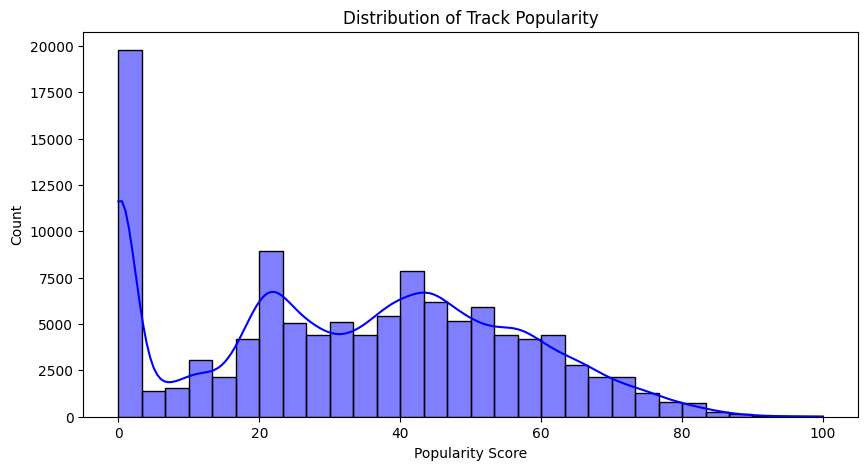

In [103]:
plt.figure(figsize=(10,5))
sns.histplot(df['popularity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Count')
plt.show()

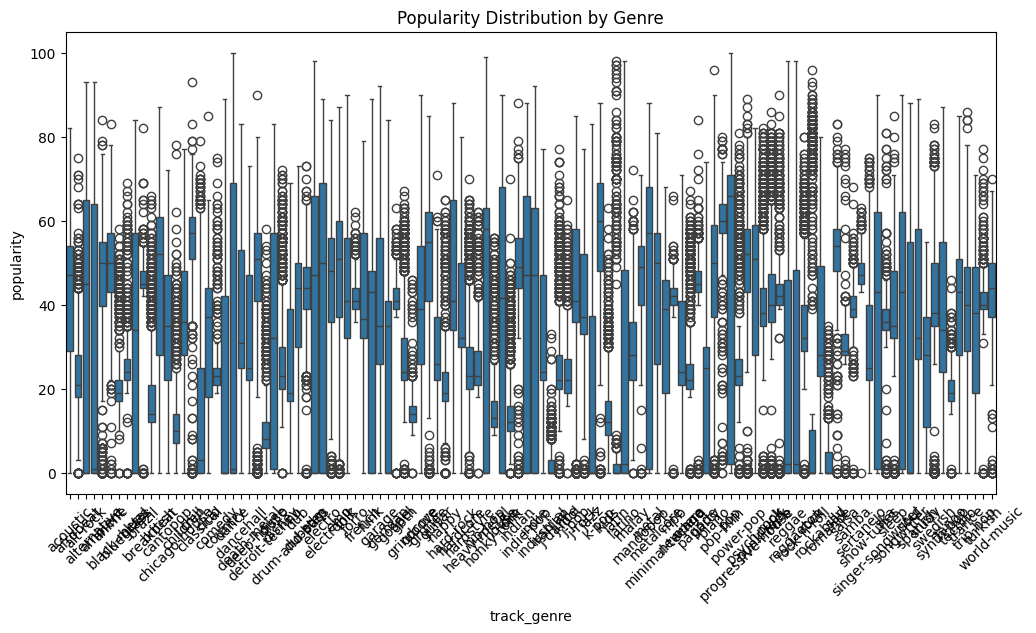

In [104]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="track_genre", y="popularity")
plt.xticks(rotation=45)
plt.title("Popularity Distribution by Genre")
plt.show()

In [105]:
top_artists = df['artists'].value_counts().head(10).index  # Top 10 artists by track count
filtered_df = df[df['artists'].isin(top_artists)]

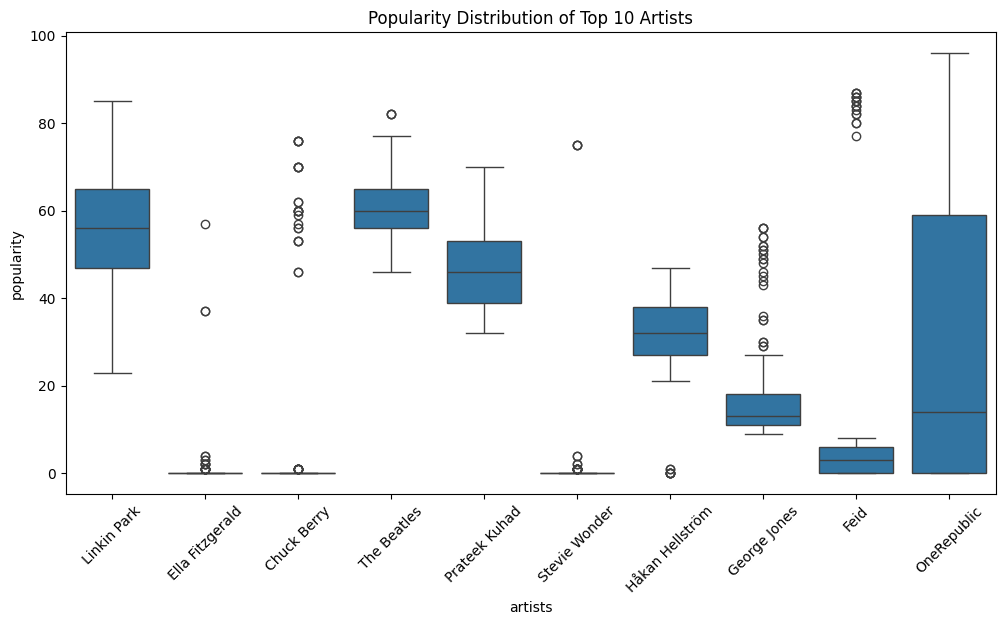

In [106]:
plt.figure(figsize=(12,6))
sns.boxplot(data=filtered_df, x="artists", y="popularity")
plt.xticks(rotation=45)
plt.title("Popularity Distribution of Top 10 Artists")
plt.show()

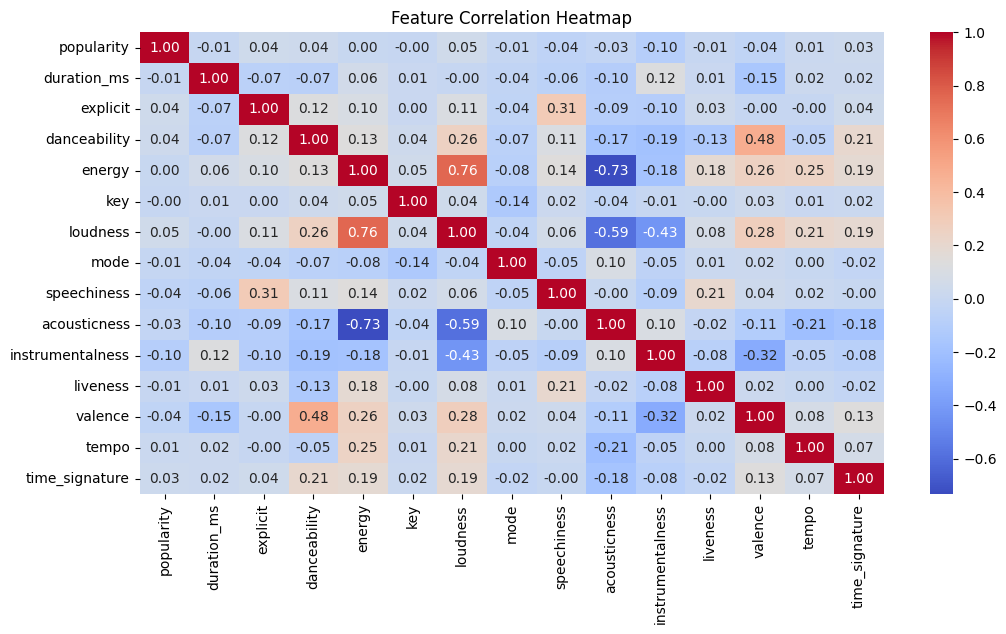

In [107]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [108]:
artist_popularity = df.groupby("artists")["popularity"].mean().reset_index()
artist_popularity = artist_popularity.sort_values("popularity", ascending=False).head(10)

C:\Users\vinut\AppData\Local\Temp\ipykernel_17996\2334403813.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




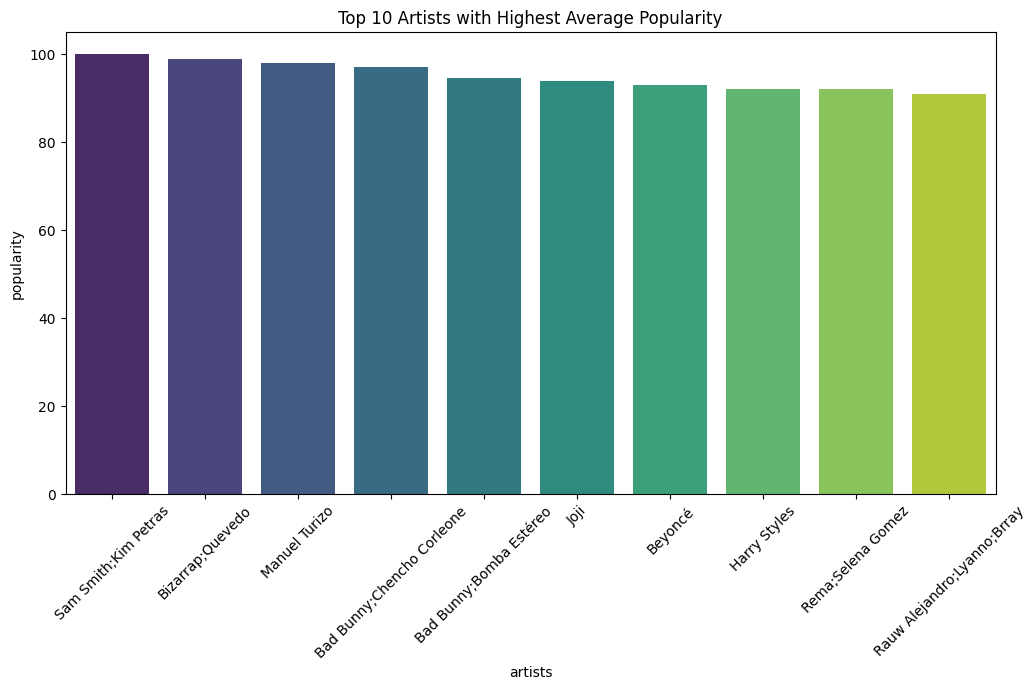

In [109]:
plt.figure(figsize=(12,6))
sns.barplot(data=artist_popularity, x="artists", y="popularity", palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Artists with Highest Average Popularity")
plt.show()

C:\Users\vinut\AppData\Local\Temp\ipykernel_17996\2807642447.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




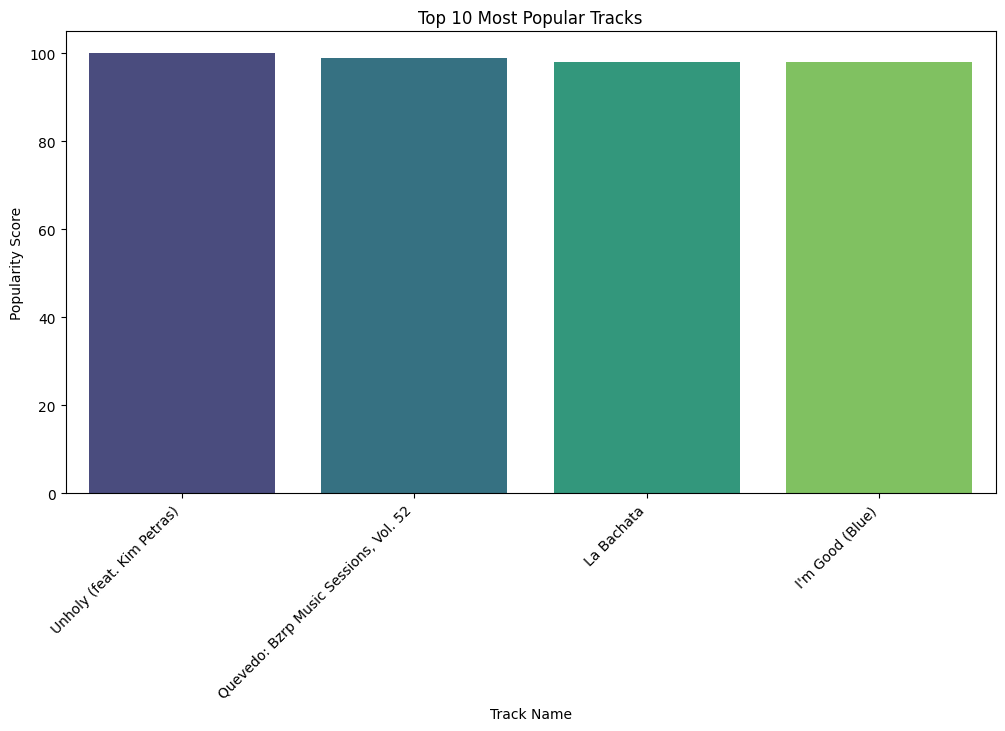

In [110]:
top_tracks = df.sort_values(by="popularity", ascending=False).head(10)
# Plot bar chart for the top 10 tracks
plt.figure(figsize=(12,6))
sns.barplot(data=top_tracks, x="track_name", y="popularity", palette="viridis")

plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.xlabel("Track Name")
plt.ylabel("Popularity Score")
plt.title("Top 10 Most Popular Tracks")
plt.show()

In [111]:
# top_tracks['type']

In [112]:
# df['track_album_name'].value_counts()

In [113]:
df.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [114]:

# def most_common_genre(genre_string):
#     genres = genre_string.split(", ") 
#     return max(set(genres), key=genres.count)

In [115]:
# df_grouped = df.groupby(['artists', 'track_name'])['track_genre'].agg(", ".join)
# df_grouped = df_grouped.apply(most_common_genre)
# df['track_genre_pseudo'] = df.set_index(['artists', 'track_name']).index.map(df_grouped)
# df

In [116]:
track_genre_count = df.groupby('track_genre_pseudo')['track_genre_pseudo'].count()
fig5 = px.bar(track_genre_count, labels = {'index': 'Track Genre', 'value': 'Count'},
              title = 'Track Genre Count')
fig5

KeyError: 'track_genre_pseudo'

In [117]:
# df['Popularity Classification'] = df['popularity'].apply(lambda x: 'high' if x > 68 else 'low')
# df.iloc

In [118]:
df['popularity'].value_counts().sort_values(ascending = True)

popularity
99         1
100        2
95         5
96         7
98         7
       ...  
1       2140
44      2288
21      2344
22      2354
0      16020
Name: count, Length: 101, dtype: int64

In [119]:
df['track_name']

0                             Comedy
1                   Ghost - Acoustic
2                     To Begin Again
3         Can't Help Falling In Love
4                            Hold On
                     ...            
113995           Sleep My Little Boy
113996              Water Into Light
113997                Miss Perfumado
113998                       Friends
113999                     Barbincor
Name: track_name, Length: 114000, dtype: object

In [120]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [121]:
df_cop = df.drop(['track_genre', 'track_name', 'artists', 'album_name', 'track_id', 'popularity'], axis = 1)
# y = df['Popularity Classification']
# cat = ['playlist_subgenre', 'track_genre_pseudo']
# df_cop[cat] = df_cop[cat].apply(LabelEncoder().fit_transform)
df_cop

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [122]:
df_cop

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


## pipeline

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [159]:
df.dropna(inplace=True)

In [160]:
X = df.drop(['track_name', 'album_name', 'track_id', 'popularity', 'explicit'], axis = 1)
y = df['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [161]:
categorical_cols = ['track_genre']
text_cols = ['artists']
numerical_cols = X_train.select_dtypes(include=['number']).columns.tolist()


categorical_transformer = Pipeline(steps=[
    ('encode_cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
])

text_transformer = TfidfVectorizer()

numerical_transformer = Pipeline(steps=[
    ('impute_medians', SimpleImputer(strategy='median')),
    ('standard_scale', StandardScaler())
])

In [162]:
preprocessor = ColumnTransformer(transformers=[
    ('numerical_data', numerical_transformer, numerical_cols),
    ('categorical_data', categorical_transformer, categorical_cols),
    ('text_data', text_transformer, 'artists')
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [163]:
pipeline.fit(X_train, y_train)
y_pred_pipe = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred_pipe)
r2 = r2_score(y_test, y_pred_pipe)
rmse = root_mean_squared_error(y_test, y_pred_pipe) 

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")
print(f"rmse: {rmse:.2f}")

Mean Squared Error: 248.29
R2 Score: 0.50
rmse: 15.76


np.int64(0)

In [36]:
y

0        low
1        low
2        low
3        low
4        low
        ... 
1681    high
1682    high
1683    high
1684    high
1685    high
Name: Popularity Classification, Length: 4831, dtype: object

In [41]:
X = df_cop.fillna(df_cop.median())
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
X.isnull().sum(axis = 0)

time_signature              0
track_popularity            0
speechiness                 0
danceability                0
duration_ms                 0
energy                      0
playlist_subgenre           0
mode                        0
track_album_release_date    0
instrumentalness            0
valence                     0
key                         0
tempo                       0
loudness                    0
acousticness                0
liveness                    0
track_genre_pseudo          0
dtype: int64

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(X_train)  
test_x_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

C:\Users\vinut\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=500)

In [45]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.921406411582213